##Import Libraries

In [1]:
import torch
!pip install torchsummary
from torchsummary import summary
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import sys
import torch.nn as nn
import os

##Mount Google Drive to get files

In [2]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [3]:
!rm -rf '/content/drive/My Drive/colab_notebooks/S9/__pycache__'
!ls -lrt '/content/drive/My Drive/colab_notebooks/S9/'

total 156
-rw------- 1 root root   594 Feb  6 09:42 visualise_loss_acc.py
-rw------- 1 root root  1644 Feb  6 09:42 train_test_loader.py
-rw------- 1 root root  1512 Feb  6 09:42 training.py
-rw------- 1 root root  1332 Feb  6 09:42 testing.py
-rw------- 1 root root  4085 Feb  6 09:42 resnet18.py
-rw------- 1 root root  6767 Feb  6 09:42 gradcam.py
-rw------- 1 root root  1475 Feb  6 09:42 get_images.py
-rw------- 1 root root   722 Feb  6 09:42 albumentation_transforms.py
drwx------ 2 root root  4096 Feb  6 09:43 data
-rw------- 1 root root 57606 Feb  6 10:12 acc_vs_loss.jpg
-rw------- 1 root root 41540 Feb  6 10:12 gradcam_incorrect_1_cat.png
-rw------- 1 root root 35468 Feb  6 10:12 gradcam_incorrect_0_cat.png


##Add Google Drive path to system path

In [4]:
os.chdir('./drive/My Drive/colab_notebooks/S9/')

!ls

acc_vs_loss.jpg		     gradcam_incorrect_1_cat.png  training.py
albumentation_transforms.py  gradcam.py			  train_test_loader.py
data			     QuizDNN.py			  visualise_loss_acc.py
get_images.py		     resnet18.py
gradcam_incorrect_0_cat.png  testing.py


##Import python files

In [5]:
import train_test_loader as ttl
import QuizDNN as bm
import training as trn
import testing as tst
import visualise_loss_acc as vis
import gradcam as gc
import get_images as gc_img

##Main Function

In [6]:
def main(classes):

  train_loader, test_loader,test_transform = ttl.get_train_test(classes)

  use_cuda = torch.cuda.is_available()
  device = torch.device("cuda" if use_cuda else "cpu")
  print(device)

  model = bm.S9Quiz().to(device)
  summary(model, input_size=(3, 32, 32))

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  scheduler = StepLR(optimizer, step_size=35, gamma=0.1)
  EPOCHS=15
 
  test_loss=[]
  test_accuracy=[]
  for epoch in range(EPOCHS):
      print("EPOCH:", epoch + 1)
      train_losses,train_acc=trn.train(model, device, train_loader, optimizer,EPOCHS,criterion,l1=1e-6,l2=1e-3)
      scheduler.step()
      test_losses,test_acc=tst.test(model, device, test_loader,criterion)

      test_loss.append(test_losses)
      test_accuracy.append(test_acc)
  
  vis.plot_acc_loss(test_loss,test_accuracy)

##Calling Main

CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified
cuda


  0%|          | 0/391 [00:00<?, ?it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
              ReLU-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
           Dropout-4           [-1, 64, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          36,864
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
             ReLU-10           [-1, 64, 32, 32]               0
      BatchNorm2d-11           [-1, 64, 32, 32]             128
        MaxPool2d-12           [-1, 64, 16, 16]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
             ReLU-14           [-1, 64,

Loss=1.486670732498169 Batch_id=390 Accuracy=43.63: 100%|██████████| 391/391 [00:29<00:00, 13.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0096, Accuracy: 5553/10000 (55.53%)

EPOCH: 2


Loss=1.367748737335205 Batch_id=390 Accuracy=57.71: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0083, Accuracy: 6245/10000 (62.45%)

EPOCH: 3


Loss=1.1174347400665283 Batch_id=390 Accuracy=64.35: 100%|██████████| 391/391 [00:29<00:00, 13.15it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0066, Accuracy: 7015/10000 (70.15%)

EPOCH: 4


Loss=0.9444544315338135 Batch_id=390 Accuracy=68.48: 100%|██████████| 391/391 [00:30<00:00, 12.90it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 7320/10000 (73.20%)

EPOCH: 5


Loss=1.0038466453552246 Batch_id=390 Accuracy=71.39: 100%|██████████| 391/391 [00:30<00:00, 12.86it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0057, Accuracy: 7514/10000 (75.14%)

EPOCH: 6


Loss=0.7578309774398804 Batch_id=390 Accuracy=73.85: 100%|██████████| 391/391 [00:30<00:00, 12.95it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0050, Accuracy: 7862/10000 (78.62%)

EPOCH: 7


Loss=0.754156768321991 Batch_id=390 Accuracy=75.29: 100%|██████████| 391/391 [00:29<00:00, 13.04it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0048, Accuracy: 7922/10000 (79.22%)

EPOCH: 8


Loss=0.9363038539886475 Batch_id=390 Accuracy=76.74: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 8010/10000 (80.10%)

EPOCH: 9


Loss=0.6851893663406372 Batch_id=390 Accuracy=77.78: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8111/10000 (81.11%)

EPOCH: 10


Loss=0.6233958005905151 Batch_id=390 Accuracy=78.38: 100%|██████████| 391/391 [00:29<00:00, 13.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8223/10000 (82.23%)

EPOCH: 11


Loss=0.7628393769264221 Batch_id=390 Accuracy=79.35: 100%|██████████| 391/391 [00:29<00:00, 13.19it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0043, Accuracy: 8151/10000 (81.51%)

EPOCH: 12


Loss=0.6719849109649658 Batch_id=390 Accuracy=80.22: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 8187/10000 (81.87%)

EPOCH: 13


Loss=0.5962570905685425 Batch_id=390 Accuracy=80.82: 100%|██████████| 391/391 [00:29<00:00, 13.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 8405/10000 (84.05%)

EPOCH: 14


Loss=0.696250319480896 Batch_id=390 Accuracy=81.11: 100%|██████████| 391/391 [00:29<00:00, 13.06it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 8308/10000 (83.08%)

EPOCH: 15


Loss=0.6354084014892578 Batch_id=390 Accuracy=81.81: 100%|██████████| 391/391 [00:29<00:00, 13.09it/s]



Test set: Average loss: 0.0037, Accuracy: 8430/10000 (84.30%)



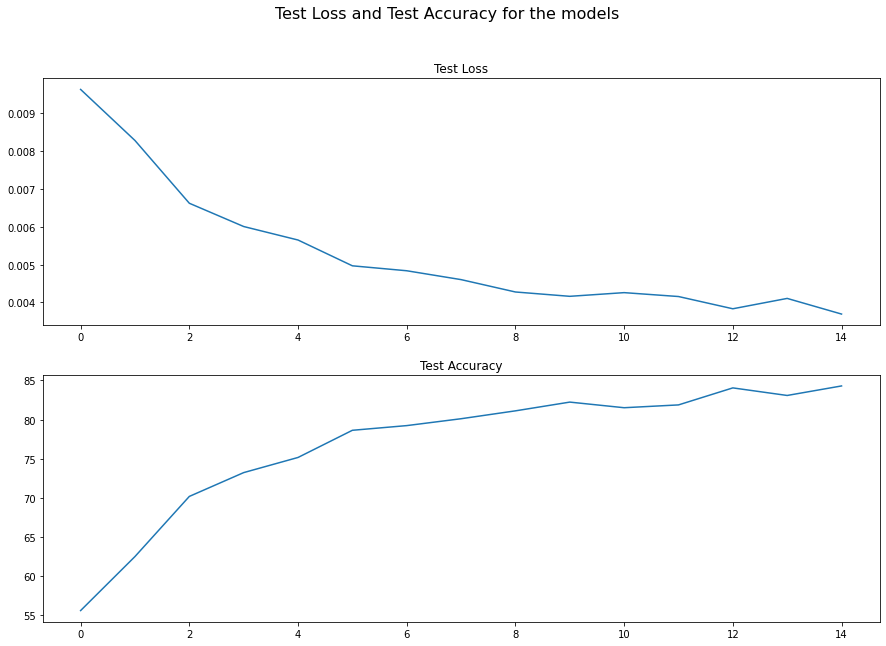

In [7]:
if __name__ == '__main__':
  from tqdm import tqdm
  if hasattr(tqdm, '_instances'):
    tqdm._instances.clear()

  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')
  
  main(classes)